In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt
from itertools import product
from scipy import optimize
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import math
from sklearn import metrics

%matplotlib inline

In [2]:
x = np.linspace(0, 2*np.pi, 1000)
print(x[-9:])

[6.23286951 6.23915898 6.24544846 6.25173793 6.25802741 6.26431688
 6.27060636 6.27689583 6.28318531]


In [3]:
y=np.sin(x)
print(y[0:11])

[0.         0.00628943 0.01257862 0.0188673  0.02515525 0.03144219
 0.03772789 0.0440121  0.05029457 0.05657505 0.06285329]


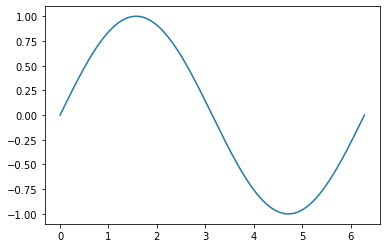

In [4]:
plt.plot(x,y)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(x.reshape(-1,1), y, test_size=0.2)

In [6]:
def comparing_plot(x,y,y_predict):
    plt.plot(x,y,'r')
    plt.plot(x,y_predict)

Linear Regression model achieves accuracy of 0.5929 with MSE as 0.1969


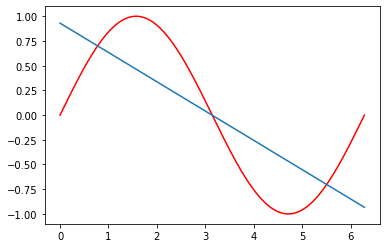

In [7]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)
score = model.score(X_train, y_train)
y_predict=model.predict(x.reshape(-1,1))
MSE = metrics.mean_squared_error(y, y_predict)
comparing_plot(x,y,y_predict)
print("Linear Regression model achieves accuracy of {:.4f} with MSE as {:.4f}".format(score, MSE))

In [8]:
# functions to test different hidden layers and learning rates
def train_mlp(units, activation='tanh', sgd=False, lr=0.001, batch_size=200,loss_curve=False):
    
    mlp = MLPRegressor(hidden_layer_sizes=units, activation=activation)
    if sgd:
        mlp.set_params(solver='sgd', batch_size=batch_size, momentum=0.0, learning_rate_init=lr,verbose=False)
    
    mlp.fit(X_train, y_train)
    accuracy = mlp.score(X_test,y_test)
    y_predict=mlp.predict(x.reshape(-1,1))
    MSE = metrics.mean_squared_error(y, y_predict)
    comparing_plot(x,y,y_predict)
#     print(mlp.get_params())
    if loss_curve:
        return mlp.loss_curve_, accuracy
    
    return accuracy, MSE

MSE with one hidden layer (3 hidden neurons): 0.0194


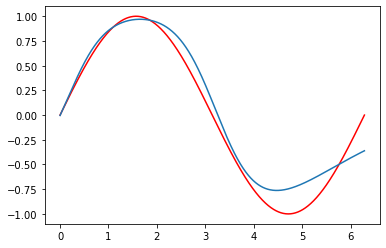

In [9]:
accuracy, MSE =train_mlp(units=(5,), activation='tanh',sgd=True, batch_size=10,lr=0.25)
print("MSE with one hidden layer (3 hidden neurons): %.4f" % MSE)

MSE with one hidden layer (3 hidden neurons) and learning rate as 0.010 : 0.0498
MSE with one hidden layer (3 hidden neurons) and learning rate as 0.031 : 0.0406
MSE with one hidden layer (3 hidden neurons) and learning rate as 0.051 : 0.0059
MSE with one hidden layer (3 hidden neurons) and learning rate as 0.072 : 0.0369
MSE with one hidden layer (3 hidden neurons) and learning rate as 0.092 : 0.0257
MSE with one hidden layer (3 hidden neurons) and learning rate as 0.113 : 0.0058
MSE with one hidden layer (3 hidden neurons) and learning rate as 0.133 : 0.0027
MSE with one hidden layer (3 hidden neurons) and learning rate as 0.154 : 0.0294
MSE with one hidden layer (3 hidden neurons) and learning rate as 0.174 : 0.0365
MSE with one hidden layer (3 hidden neurons) and learning rate as 0.195 : 0.0321
MSE with one hidden layer (3 hidden neurons) and learning rate as 0.215 : 0.0024
MSE with one hidden layer (3 hidden neurons) and learning rate as 0.236 : 0.0344
MSE with one hidden layer (3

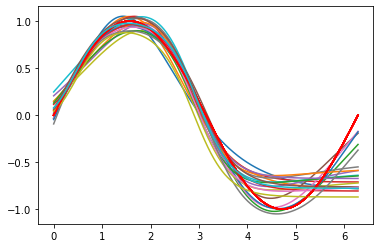

In [11]:
learning_rates = np.linspace(0.01, 0.4, 20)
for k in learning_rates:
    accuracy, MSE =train_mlp(3, activation='tanh',sgd=True, batch_size=10,lr=k)
    print("MSE with one hidden layer (3 hidden neurons) and learning rate as %.3f : %.4f" % (k,MSE))

Mean Square Error: 0.0098
Score: 0.9480


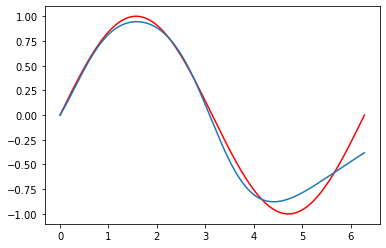

In [12]:
score, MSE=train_mlp((7,), activation='tanh',sgd=True, batch_size=10,lr=0.092)
print('Mean Square Error: %.4f'% MSE)
print('Score: %.4f'% accuracy)